<a href="https://colab.research.google.com/github/dhruvpatel1205/FakeNewsAnalysis/blob/main/Fake_news_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'textdb3:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F129603%2F310019%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T185524Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D262b37dc608dfe385fa6edff5708013619daf43e25762f50a98b480e2343e364286eddfe62a765278a2137d8829501c13f684f2a9f0377be0e8ffa0a9efe32de995504f045ecfcbb1d9c56ec51da7c53f9670f94cd04e503ca1bb2a205e05ad28368bfc1969fae7a2ab7b93e3b39808a5fcb35368300a68921e057d653923371c09a222caeb21aa8e17f7292a5a48a520ebed3e412159a52bb11ea0136bc0077229d6558b6f8f0f144710723740ac32e8b6b26d787f80a2890c67653dd8aaecc9a3d6a104df7b838338ec760fa0d7363b16189e75e965374c28971d24341107adf4dd6ab266dd2db00e2e2cfaf3e9ac90e83c49007670dff39e662168add6b0e'
DATA_SOURCE_MAPPING = 'textdb3:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F129603%2F310019%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T070432Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1a2304978371c58cab1e3d41c3a33c2b83ae5f1841135d822d1b932c585efb79079670791c43548a456098e669dc21a613314c356abc46ee38ca52bb6ea2fba3ef4c1673bda31d88ea1e9f6305bbe1ffc4bfb7ea4d82361a69d9c7ec0d8dc3751020c2922d6164e75807f40416ef94e8578c22246238dbedf65cb991b2b755e07060f6c7fb2c30bd316fd5bb06cd272901c164ab6c59b41d7ee25d67124d72bb7c4bf56e07bbb48179a887a442039d4c43732b4d63302abf900fc260868e3d1c29427b38702e0dc12d9151a1a73a92e863bf72d5af56d41559605049797853eaf0731f7eda7f8d0bbe3c45135ae5c00314fb557ea32257d733bed743134f3284,source-based-news-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F747224%2F1449505%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T070432Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D81a36574eb116d3732c77287953563bcf8e8c2767e557af71d382bca3fa1e7126edd4bd5331ddaa67f115eecc5b70e85fb904171095ea1fae08ab43eb9ef9ea8169e7d6a71e91cc9be89c54c67d9507677a73d11e69cc8d4a2e0c66ac776f1a731ba504accb91a7a2fb4c784bf6b4fa7008c7331df6c75075940e059028973cac64bf4b21526609bb29b82ca886ab55ba9c57b36d0cebfff89de2ea6b946387f8006d7bfa0f31c20eebd7ccc972c4aad9d50072cf8218342b1b8ef8f09b10362850e13fd5a695d8a08c2235ed48a924a6df1f77e0cced672e6d54e73fdede0a32a7d0747da86077c2de873499dac5154882c88d893d1f746fea6ecf0eef0de5c,fake-news:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2623949%2F4484183%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T070432Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D80579106925e8b1d34bd5be5fb60d4e290d197da6854d192aa4598c7d269d96c5a9308725c456abb790a5dd095b41fbf74ec87660a50858c1f3ba79f953717b320330900120b68b39fc4db08bfbccdb93cfee0f47d79c3ebc99cf00d45c0db36f6f82f2d3640ea8aa9429abceca3c2caa8404190867a77eb9bb3368018b4e8f3e4bc5f2a22ac4bb4447a995db2fb03b40cf5d143d916f86e939dbafc7a117f08e4c121a48da90e9d49fb747dff63bb9991db61b18e572b339562106d9e8ce0076464a534ea621f86ce3d05c0e1d421e546f923d3d3aac81484d5dae2d8c2431736f77557a1510a93028debdbfff9477beef50f49eb1b8edea54020d315c17a85,fake-news-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2093157%2F6641062%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T070432Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1602654b572afcd61cf9a27ee01054c3e8238634b0adfc817b096e5e440a56458bcd5cdc02225b80f30f3d50b79df75c44692f915610a07dad1b855000cbe844c1d6c0ddea67f965a55401049aaf39c26a1e41a64d4b35c20f9e48d6a2b444134de6a7c69dbc494829928db3e3369149b69fdc176e88d7df17ab3027113d96488c5d24cba7c108ad54a920cac617f50e4f99f257944dd22a41c16bbeec21decf710610e03d3b357609ffc4dfcb8cbc58617b2433cf91116df5a250d7d811d73cf5ec0a8d14a677f3610576504973a15bfd0a76c9e4a187f0eabd4d4621356073e76b82847921bc35580a5685c97715cde86b43fcb979256201ff7068027f681d,fake-news-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4180521%2F7222412%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240515%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240515T070432Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6644a175f004e244701f30590014eed900890888ef86b46b54fed433c05fc501fd56d797526c9080710b4d9521a7734164364097a51bb9663454172d1ef7871bc0d2e8f25e481f1a0159c15c5b8fc2e9a5ff502add4d018cf7252807882170a0caa109122c2d7c85d5ff6b6bc31100e4ac5993d45f3a1b24d4d576bb7a6bf8381908ec40d785f5b9e7c8b7dd2dfc3b95e695ac02b3e48a29a671e1c21522748748da444da24120b1b535fa8c5d67f43aa8527a9e3f6ff9f0af42e120357b4cf73864652c9ea40d4324c022c0bde311786c44062cd7fc86d22a456d6eec464c4803ac2277d6f097aa9743584269746a55bfa0dd9fa60358b21679c6c1530e7370'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 12016425 bytes downloaded
Downloaded and uncompressed: textdb3
[==================================================] 3116791 bytes downloaded
Downloaded and uncompressed: source-based-news-classification
[==================================================] 1760511 bytes downloaded
Downloaded and uncompressed: fake-news
[==================================================] 96615040 bytes downloaded
Downloaded and uncompressed: fake-news-classification
[==================================================] 42975911 bytes downloaded
Downloaded and uncompressed: fake-news-detection
Data source import complete.


# **Import Libraries**

In [ ]:
!pip install scikit-plot
!pip install wordcloud
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns
import warnings
from bs4 import BeautifulSoup
import re
import gc
import scikitplot
%matplotlib inline
warnings.filterwarnings('ignore')

# Table of Contents
**1. Reading data and Overview**

**2. Analysis of Each column(Observations) and Preprocessing**

1.   Analysing Label column.
2.   Analysing Unnamed:0 column.
3.   Analysing Title.
4.   Analysing Text.

**3. DataMining (Machine learning Models)**

1.   With Unnamed column
2.   Without Unnamed column.

**4. Comparing Models**

**5. Findings**


# **Reading Data**

In [ ]:
df = pd.read_csv("/kaggle/input/textdb3/fake_or_real_news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


**Observations in Data:**

   * There are total of **4** columns and **6335** rows in data.

   * There are **no** missing values in the dataset.

   * "**label**" is the target column.
    
      
   * There is a column with **Unnamed: 0** column name that we don't know yet. It is the only column of numeric type.
    
   * The remaining two columns are the title and the text content


# **Data Exploration**

## **Analysing the label column.**

In [ ]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

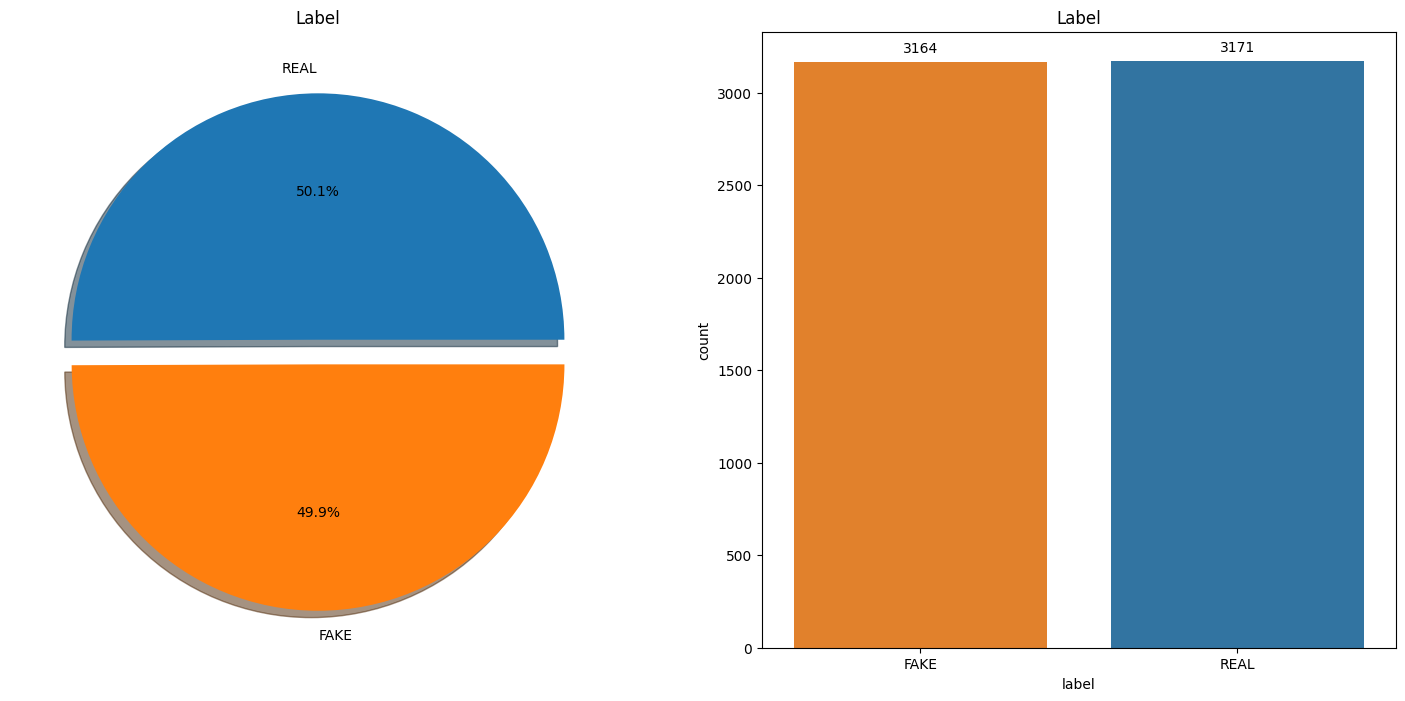

In [ ]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Plot pie chart
df['label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Label')
ax[0].set_ylabel('')

# Get colors used in pie chart
pie_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:len(df['label'].unique())]

# Plot count plot with the same colors and counts
sns.countplot(x='label', data=df, ax=ax[1], palette=pie_colors[::-1])  # Reverse the order of colors

# Annotate counts on top of bars
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 10),
                   textcoords='offset points')

ax[1].set_title('Label')

plt.show()

**Observations of Label Column:**


*   The number of REAL labels accounted for **50.1%** of the total data and **49.9%** of the FAKE labels.
*   In total, there are **3,171** real news and **3,164** fake news.

*   The number of the two labels is approximately the **same**.


**Updating the label column**

In [ ]:
df['label'] = df['label'].replace("REAL", 1)
df['label'] = df['label'].replace("FAKE", 0)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


## **Analysing the Unnamed column**

<Axes: xlabel='label', ylabel='Unnamed: 0'>

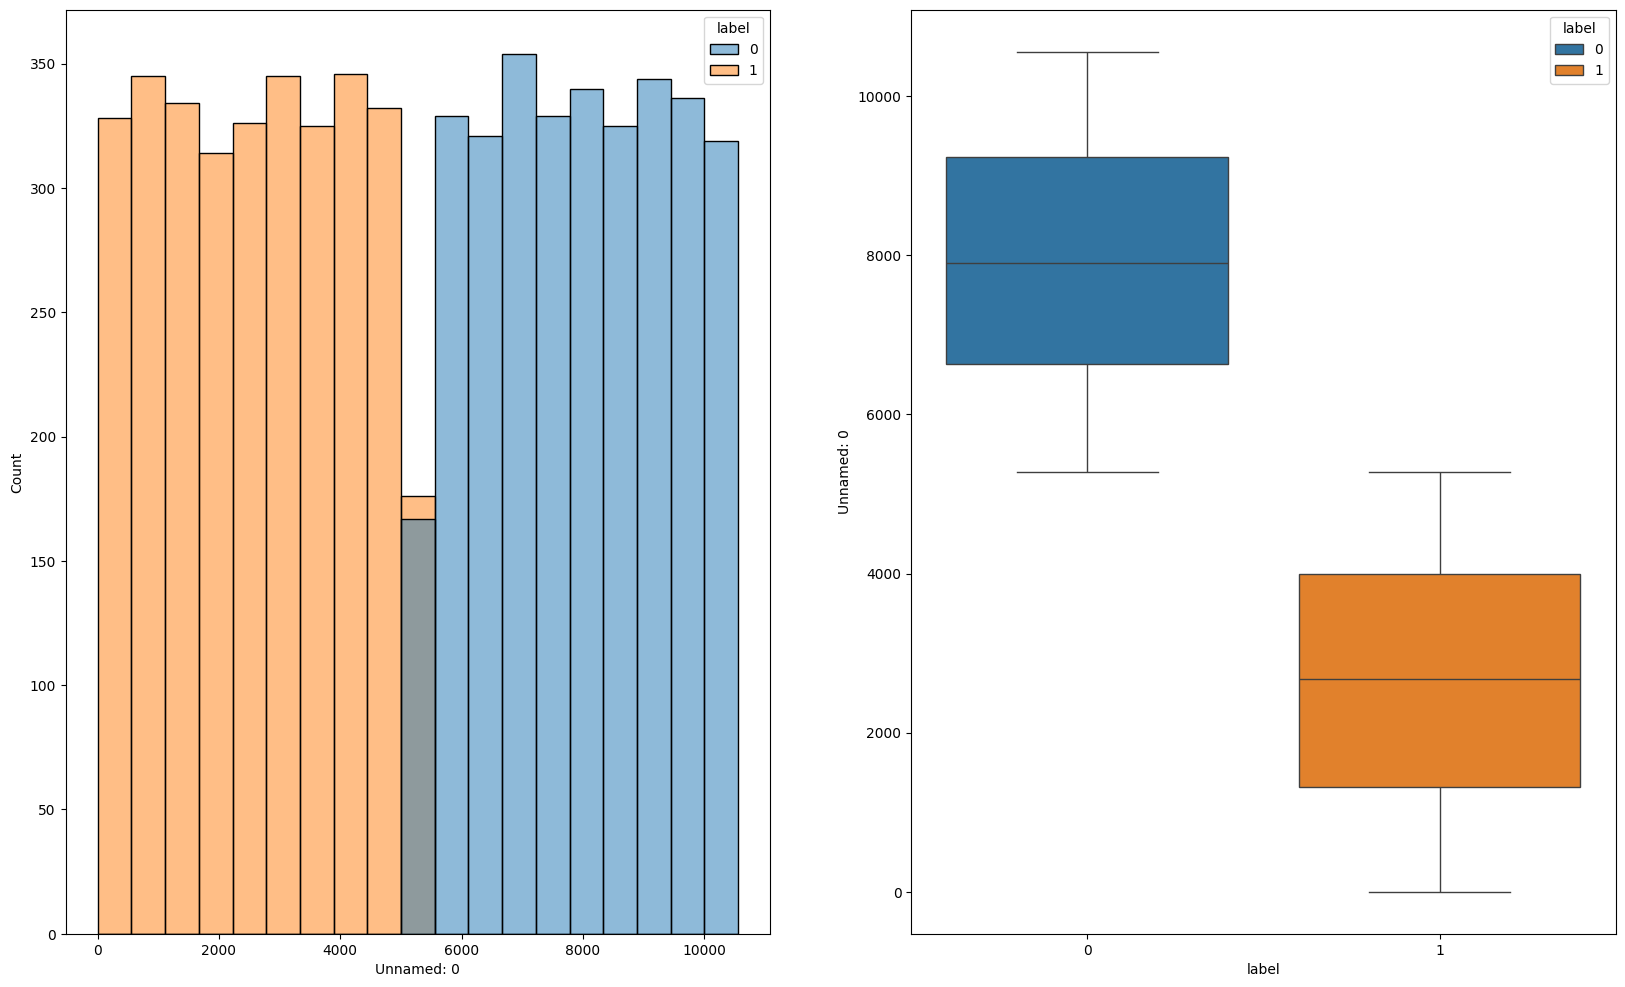

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 12))

sns.histplot(ax = axes[0], x = 'Unnamed: 0', hue = 'label', fill = True, data = df)
sns.boxplot(ax = axes[1], x = 'label', y = 'Unnamed: 0', hue = 'label', data = df)

**Observations of Unnamed column:-**

   * In the **Unnamed:0**  column, **real news**  is less than its middle value, and **fake news** is greater than its middle value.

   * There are both fake and real news in the **middle value cross section**.


In [ ]:
df['Unnamed: 0'].nunique()

6335

 Since all are **unique**, guessing this column is the ID column.

**Updating the Unnamed: 0 Column**

In [ ]:
df = df.rename(columns={"Unnamed: 0": "ID"}).sort_values(by="ID", axis=0)
df.head()

,ID,title,text,label
5603,2,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,1
565,3,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",1
2099,5,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,1
2197,6,"Despite Constant Debate, Americans' Abortion O...",It's been a big week for abortion news.\n\nCar...,1
5974,7,Obama Argues Against Goverment Shutdown Over P...,President Barack Obama said Saturday night tha...,1


## **Analysing Title column**

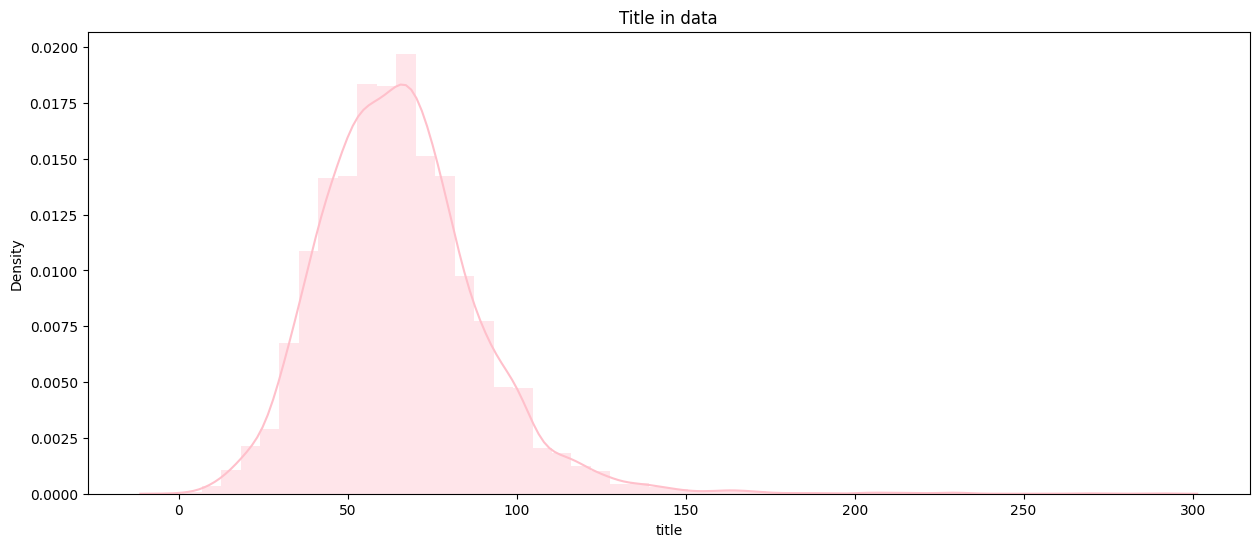

In [ ]:
df_title=df['title'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_title,ax=ax,color='pink')
ax.set_title('Title in data')
plt.show()

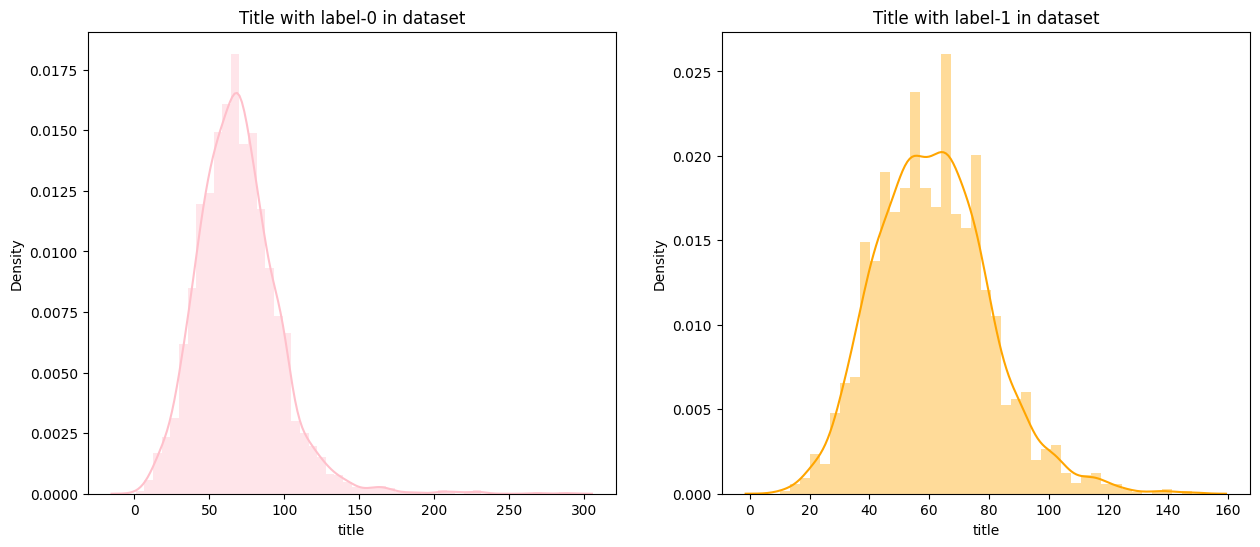

In [ ]:
df_title_0=df['title'][df['label']==0].str.len()
df_title_1=df['title'][df['label']==1].str.len()

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.distplot(df_title_0,ax=ax[0],color='pink')
sns.distplot(df_title_1,ax=ax[1],color='orange')

ax[0].set_title('Title with label-0 in dataset')
ax[1].set_title('Title with label-1 in dataset')

plt.show()

**Observations of Title:**

   *  The text length of fake news title is concentrated between **50** and **100**.

   * The text length of the title of real news is concentrated between **40** and **80**.

   * All titles longer than **200** are fake news.


In [ ]:
unique_title = df["title"].value_counts()[df["title"].value_counts()==1].index
duplicate_title = df["title"].value_counts()[df["title"].value_counts()>1].index
print(f"There are {len(unique_title)} non-repeating news titles")
print(f"There are {len(duplicate_title)} duplicate news titles")

There are 6183 non-repeating news titles
There are 73 duplicate news titles


**Checking the duplicate titles**

In [ ]:
duplicate_title[:5]

Index(['OnPolitics | 's politics blog',
       'Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids',
       'Michael Moore Owes Me $4.99',
       'Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence',
       'Paintings 'almost no one else seemed to be doing''],
      dtype='object', name='title')

**Title word cloud**

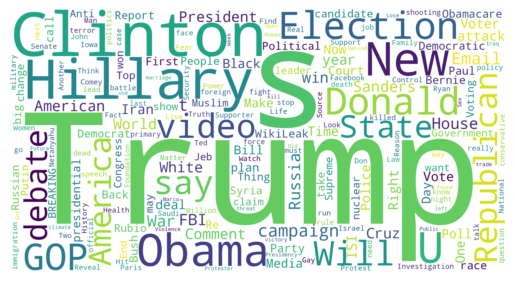

In [ ]:
from wordcloud import WordCloud
titles = " ".join(title for title in df["title"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Context**:- Using the word cloud, we can clearly understand which words appear most in the entire data set.

**Fake news title**

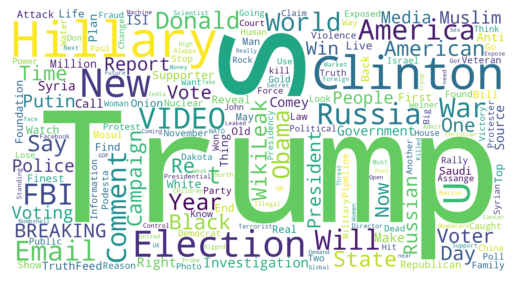

In [ ]:
titles_0 = " ".join(title for title in df["title"][df["label"]==0])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles_0)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Real news title**

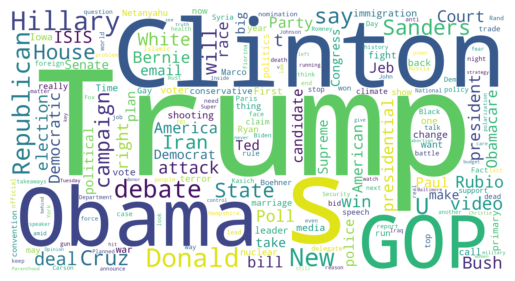

In [ ]:
titles_1 = " ".join(title for title in df["title"][df["label"]==1])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(titles_1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Analysing Text Column**

Preprocessing Text column

In [ ]:


def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

df['text'] = df['text'].apply(preprocess)
# lematizing nldk.

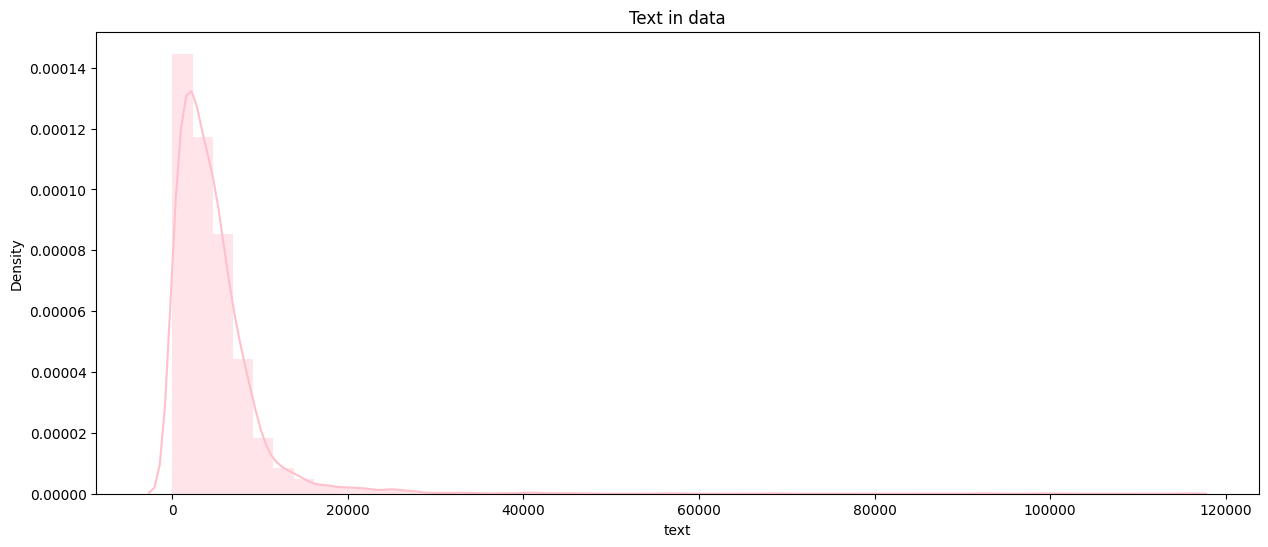

In [ ]:
df_text=df['text'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_text,ax=ax,color='pink')
ax.set_title('Text in data')
plt.show()

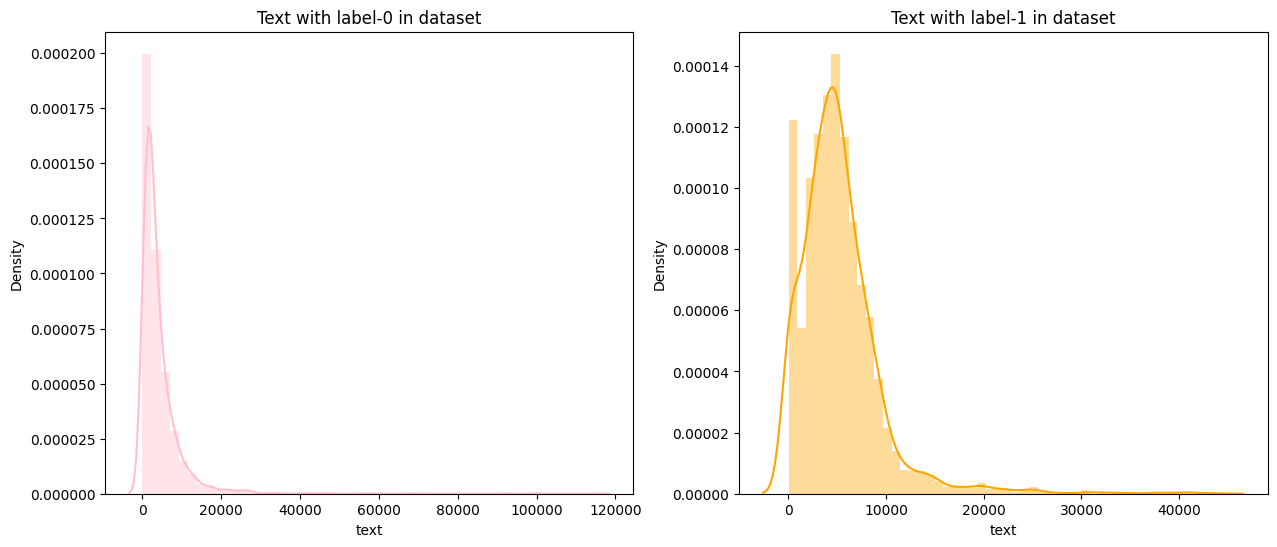

In [ ]:
df_text_0=df['text'][df['label']==0].str.len()
df_text_1=df['text'][df['label']==1].str.len()

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.distplot(df_text_0,ax=ax[0],color='pink')
sns.distplot(df_text_1,ax=ax[1],color='orange')

ax[0].set_title('Text with label-0 in dataset')
ax[1].set_title('Text with label-1 in dataset')

plt.show()

**Observations of Text:**

   * The text length of most news (whether fake news or real news) is between 0 and 100.

   * Those with particularly long text content are fake news.

**Text word cloud**

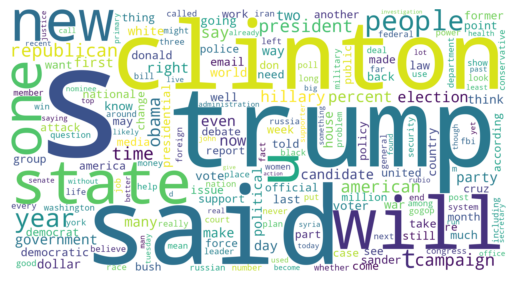

In [ ]:
texts = " ".join(text for text in df["text"])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Fake news text**

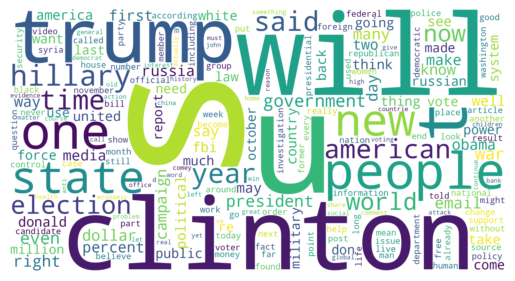

In [ ]:
texts_0 = " ".join(text for text in df["text"][df["label"]==0])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts_0)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Real news text**

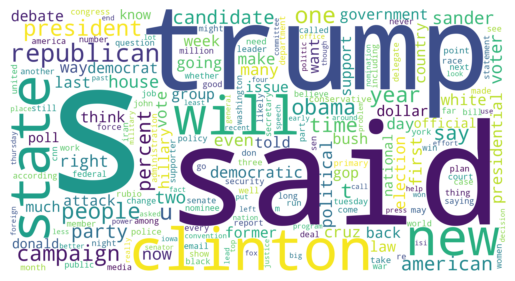

In [ ]:
texts_1 = " ".join(text for text in df["text"][df["label"]==1])

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080).generate(texts_1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# **DataMining (Machine learning Models)**

**Importing modules**

In [ ]:
! pip install imblearn
import os
import time
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedGroupKFold, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report
import scikitplot as skplt
from imblearn.over_sampling import RandomOverSampler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.5 MB/s eta 0:00:00


## **With Unnamed column**

In [ ]:
folds = 5
kf = StratifiedGroupKFold(n_splits=folds)

* the ID column has a huge relationship with the label column.

* In practical applications, the ID of the news must not be used for prediction. For details, see the code below.

In [ ]:
df_1 = df[["ID", "label"]]
df_1.head()

,ID,label
5603,2,1
565,3,1
2099,5,1
2197,6,1
5974,7,1


In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=df_1.drop(['label'],axis=1)
y=df_1['label']
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.2, random_state= 42)

**KNN**

Accuracy: 1.0
ROC AUC Score: 1.0


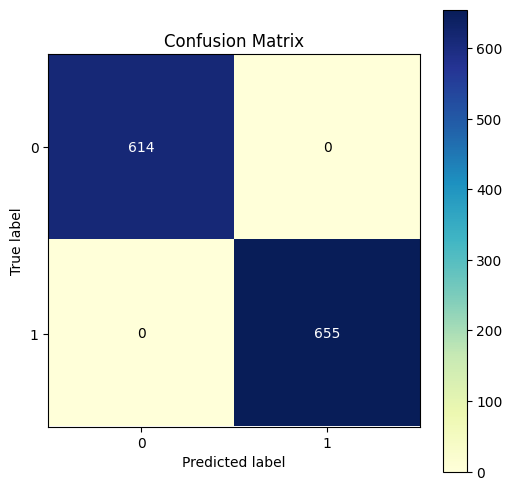

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn))

**Random Forest**

Accuracy: 1.0
ROC AUC Score: 1.0


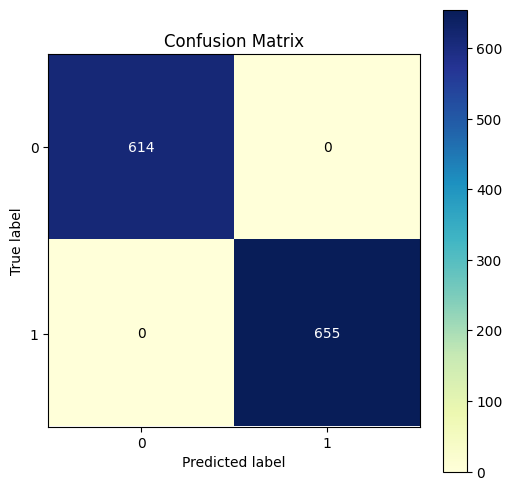

In [ ]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, figsize=(6,6), cmap= 'YlGnBu');
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_rf))

## **WithOut Unnamed column**

In [ ]:
# ***********************************
#  Splitting data
# ***********************************

x = df["text"]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# ***********************************
#  Converting to vectors
# ***********************************
vc = TfidfVectorizer()
xv_train = vc.fit_transform(x_train)
xv_test = vc.transform(x_test)

**Only use text column**

**KNN**

In [ ]:
#TODO
highest_acc = 0
for i in range(1,10,2):
  start = time.time()
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(xv_train,y_train)
  y_pred_knn = knn.predict(xv_test)
  acc = accuracy_score(y_test, y_pred_knn)
  end = time.time()
  if acc > highest_acc:
    print(f'Accuracy:{acc} for n={i} ,time={end-start}' )
    highest_acc = acc


Accuracy:0.8303078137332282 for n=1 ,time=764.654483795166


Based on the above found the best n =1

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(xv_train,y_train)
y_pred_knn = knn.predict(xv_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_classification_report = classification_report(y_test, y_pred_knn)
print('Accuracy:', knn_acc)
print(knn_classification_report)

Accuracy: 0.8303078137332282
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       610
           1       0.92      0.74      0.82       657

    accuracy                           0.83      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.85      0.83      0.83      1267



**Random Forest**

In [ ]:
highest_acc = 0
for i in range(5,200,5):
  start = time.time()
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(xv_train,y_train)
  y_pred_rf = rf.predict(xv_test)
  acc = accuracy_score(y_test, y_pred_rf)
  end = time.time()
  if acc > highest_acc:
    print(f'Accuracy:{acc} for n={i} ,time={end-start}' )
    highest_acc = acc


Accuracy:0.771112865035517 for n=5 ,time=0.3661956787109375
Accuracy:0.8397790055248618 for n=10 ,time=0.691204309463501
Accuracy:0.8484609313338595 for n=15 ,time=1.0222268104553223
Accuracy:0.8602999210734017 for n=20 ,time=1.3664429187774658
Accuracy:0.8626677190213102 for n=25 ,time=1.6517763137817383
Accuracy:0.8760852407261247 for n=30 ,time=2.004812479019165
Accuracy:0.877663772691397 for n=35 ,time=2.3766865730285645
Accuracy:0.8863456985003947 for n=40 ,time=2.651557683944702
Accuracy:0.8879242304656669 for n=45 ,time=3.037010669708252
Accuracy:0.8942383583267561 for n=50 ,time=3.316777467727661
Accuracy:0.8950276243093923 for n=65 ,time=4.3210129737854
Accuracy:0.9029202841357538 for n=75 ,time=4.940041542053223
Accuracy:0.9037095501183899 for n=120 ,time=7.904731750488281
Accuracy:0.904498816101026 for n=145 ,time=9.53548812866211
Accuracy:0.9100236779794791 for n=170 ,time=11.133628129959106


Based on the above found the best n = 150



In [ ]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(xv_train,y_train)
y_pred_rf = rf.predict(xv_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)
print('Accuracy:', rf_acc)
print(rf_classification_report)

Accuracy: 0.9100236779794791
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       647
           1       0.90      0.92      0.91       620

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



**Decision Tree**

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
y_pred_dt = DT.predict(xv_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_classification_report = classification_report(y_test, y_pred_dt)
print('Accuracy:', dt_acc)
print(dt_classification_report)

Accuracy: 0.8145224940805051
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       610
           1       0.83      0.81      0.82       657

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



**Gradient Boosting**

In [ ]:
highest_acc = 0
for i in range(10,200,10):
  start = time.time()
  GBC = GradientBoostingClassifier(n_estimators = i)
  GBC.fit(xv_train, y_train)
  y_pred_gbc = GBC.predict(xv_test)
  acc = accuracy_score(y_test, y_pred_gbc)
  end = time.time()
  if acc > highest_acc:
    print(f'Accuracy:{acc} for n={i} ,time={end-start}' )
    highest_acc = acc

Accuracy:0.819258089976322 for n=10 ,time=5.712322950363159
Accuracy:0.8484609313338595 for n=20 ,time=11.249909162521362
Accuracy:0.8689818468823993 for n=30 ,time=16.693177461624146
Accuracy:0.8808208366219415 for n=40 ,time=22.227061986923218
Accuracy:0.8871349644830308 for n=50 ,time=27.66509771347046
Accuracy:0.8895027624309392 for n=60 ,time=33.11297273635864
Accuracy:0.8918705603788477 for n=70 ,time=38.4964816570282
Accuracy:0.898973954222573 for n=80 ,time=44.14053916931152
Accuracy:0.9068666140489345 for n=90 ,time=49.41252398490906
Accuracy:0.9131807419100236 for n=100 ,time=54.72957468032837
Accuracy:0.9155485398579322 for n=120 ,time=65.60010433197021
Accuracy:0.9163378058405682 for n=140 ,time=76.5828161239624
Accuracy:0.9210734017363852 for n=150 ,time=81.60446286201477
Accuracy:0.9250197316495659 for n=160 ,time=87.16030287742615
Accuracy:0.9265982636148382 for n=170 ,time=92.44582295417786


Based on the above found the best n = 170

In [ ]:
GBC = GradientBoostingClassifier(n_estimators=170)
GBC.fit(xv_train, y_train)
y_pred_gbc = GBC.predict(xv_test)
gbc_acc = accuracy_score(y_test, y_pred_gbc)
gbc_classification_report=classification_report(y_test, y_pred_gbc)
print('Accuracy:',gbc_acc)
print(gbc_classification_report)

Accuracy: 0.925808997632202
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       658
           1       0.93      0.91      0.92       609

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



**PassiveAggressive**

In [ ]:
highest_acc = 0
for i in range(1,100,5):
  start = time.time()
  PAC = PassiveAggressiveClassifier(loss = 'squared_hinge',max_iter=i,C=0.1)
  PAC.fit(xv_train, y_train)
  y_pred_pac = PAC.predict(xv_test)
  acc = accuracy_score(y_test, y_pred_pac)
  end = time.time()
  if acc > highest_acc:
    print(f'Accuracy:{acc} for n={i} ,time={end-start}' )
    highest_acc = acc

Accuracy:0.920284135753749 for n=1 ,time=0.044783830642700195
Accuracy:0.9431728492501973 for n=6 ,time=0.1452624797821045
Accuracy:0.9439621152328335 for n=16 ,time=0.2655758857727051
Accuracy:0.9447513812154696 for n=81 ,time=0.3462049961090088


Based on the above found the best n = 81





In [ ]:
PAC = PassiveAggressiveClassifier(loss = 'squared_hinge',max_iter=81,C=0.1)
PAC.fit(xv_train, y_train)
y_pred_pac = PAC.predict(xv_test)
pac_acc = accuracy_score(y_test, y_pred_pac)
pac_classification_report=classification_report(y_test, y_pred_pac)
print('Accuracy:', pac_acc)
print(pac_classification_report)

Accuracy: 0.941594317284925
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       647
           1       0.95      0.93      0.94       620

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



# **Comparing Results**

**KNN**
**bold text**



In [ ]:
print("Highest accuracy is at ")
print("Accuracy is ",knn_acc)
print("Classification Report")
print(knn_classification_report)

Highest accuracy is at 
Accuracy is  0.8303078137332282
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       610
           1       0.92      0.74      0.82       657

    accuracy                           0.83      1267
   macro avg       0.84      0.83      0.83      1267
weighted avg       0.85      0.83      0.83      1267



**Decision Tree**

In [ ]:
print("Accuracy is ", dt_acc)
print("Classification Report")
print(dt_classification_report)

Accuracy is  0.8145224940805051
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       610
           1       0.83      0.81      0.82       657

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



**Random Forest**

In [ ]:
print("Highest accuracy is at ")
print("Accuracy is ",rf_acc)
print("Classification Report")
print(rf_classification_report)

Highest accuracy is at 
Accuracy is  0.9108129439621152
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       610
           1       0.92      0.90      0.91       657

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



**Gradient Boosting**

In [ ]:
print("Highest accuracy is at ")
print("Accuracy is ",gbc_acc)
print("Classification Report")
print(gbc_classification_report)

Highest accuracy is at 
Accuracy is  0.9163378058405682
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       610
           1       0.93      0.91      0.92       657

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



**PassiveAggressive**

In [ ]:
print("Highest accuracy is at ")
print("Accuracy is ",pac_acc)
print("Classification Report")
print(pac_classification_report)

Highest accuracy is at 
Accuracy is  0.9486977111286503
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       610
           1       0.96      0.94      0.95       657

    accuracy                           0.95      1267
   macro avg       0.95      0.95      0.95      1267
weighted avg       0.95      0.95      0.95      1267



# **Findings**